In [1]:
import networkx as nx
import konect2networkx as k2n

def konect_ust_matrix(name, number): # (internal name of the konect graph, number of generated ust graphs)
  G = k2n.get(name, download = True, logging = False)
  G2 = nx.Graph()
  G2.add_edges_from(G.edges())

  orig_edges = list(G.edges())
  res = [[0 for i in range(G.number_of_edges())] for j in range(number + 1)]

  for i in range(G.number_of_edges()):
      res[0][i] = orig_edges[i]

  for i in range(number):
      tree = nx.random_spanning_tree(G, None)
      tree_edges = list(tree.edges())
      for j in range(G.number_of_edges()):
          for k in range(tree.number_of_edges()):
              if orig_edges[j] == tree_edges[k]:
                  res[i+1][j] = 1

  for row in res:
      print(row)

  print("\nEredeti gráf:")
  nx.draw(G2, with_labels=True)

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!
[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

Eredeti gráf:


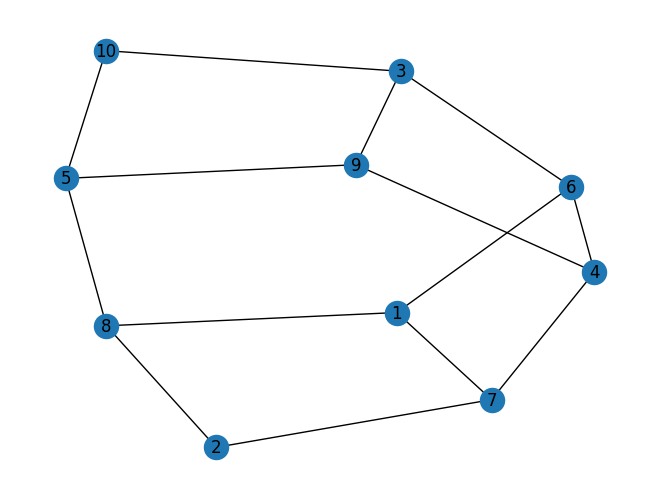

In [3]:
konect_ust_matrix('brunson_southern-women', 6)